## Getting Started

<div class="alert alert-info">

**Note:** We assume the spectrochemistry package has been properly installed - if not please go to ``install``

</div>

Before using the package, we need to load the **API (Application Programming Interface)**

The simplest way is to import all the objects and methods at once into your python namespace.

In [1]:
from spectrochempy.api import *


        SpectroChemPy's API
        Version   : 0.1a2.13
        Copyright : 2014-2017, LCS - Laboratory for Catalysis and Spectrochempy
            


but you can also import method only when it is needed.

For instances, one object very usefull in the following will be a nd-dataset to contain some data. Instead of issuing the previous command, one can do:

In [2]:
from spectrochempy.api import NDDataset
mydataset = NDDataset()

In the second line we have defined a new empty instance of **NDDataset**, wich will be further use to load our data.

Another way to proceed is to not mix the API namespace with your normal python. 

In this case, you can simply do:


In [3]:
import spectrochempy.api as scp
mydataset = scp.NDDataset()

As such, the above command ``from spectrochempy import *``, lead to import of several objects and methods in the namespace.

To get a list of all available methods or objects, type the following command:

In [4]:
APIref

['APIref',
 'Axes',
 'Axis',
 'AxisError',
 'AxisError',
 'AxisRange',
 'AxisRangeError',
 'AxisWarning',
 'CRITICAL',
 'DEBUG',
 'DimensionalityError',
 'ERROR',
 'Efa',
 'Fit',
 'FitParameters',
 'INFO',
 'Iris',
 'Isotopes',
 'Lsqnonneg',
 'Lstsq',
 'McrAls',
 'Measurement',
 'Meta',
 'NDArray',
 'NDDataset',
 'NDDatasetError',
 'NDDatasetWarning',
 'NDIO',
 'NDMath',
 'Nnmf',
 'ParameterScript',
 'Pca',
 'Quantity',
 'Svd',
 'Unit',
 'WARN',
 'abs',
 'align',
 'apodize',
 'autosub',
 'basecor',
 'concatenate',
 'conj',
 'copyright',
 'data_dir',
 'em',
 'ft',
 'gm',
 'gmb',
 'imag',
 'interpolate',
 'jmod',
 'list_data_dir',
 'load',
 'log',
 'log_level',
 'np',
 'optimize',
 'options',
 'plot',
 'plot_1D',
 'plot_2D',
 'plot_3D',
 'plot_image',
 'plot_map',
 'plot_stack',
 'plotoptions',
 'plt',
 'raises',
 'read',
 'read_bruker_nmr',
 'read_dso',
 'read_jdx',
 'read_omnic',
 'real',
 'release',
 'scipy',
 'set_nmr_context',
 'sine',
 'skl',
 'sort',
 'sp',
 'squeeze',
 'swapaxes'

If something goes wrong with during a cell execution,  a ``traceback`` is displayed.

For instance, the object or method ``toto``does not exist in the API, so an error (**ImportError**) is generated when trying to import this from the API. Here we catch the error in the context raises or more traditionnaly with a try except structure

In [5]:
with raises(ImportError):
    from spectrochempy import toto

In [6]:
try:
    from spectrochempy import toto
except ImportError:
    log.error("OOPS, THAT'S AN IMPORT ERROR!")

 ERROR | OOPS, THAT'S AN IMPORT ERROR!


The error will stop the execution if not catched. The message that would have been displayed without the catching, can be displayed after all with the magic function %tb.

## Configuration

Many options of the API can be set up

In [7]:
options.log_level = INFO

In the above cell, we have set the **log** level to display ``info`` messages, such as this one:

In [8]:
log.info('this is an info message!')
log.debug('this is a debug message!')

 this is an info message!


Only the info message is displayed, as expected.

If we change it to ``DEBUG``, we should get the two messages

In [9]:
options.log_level = DEBUG

log.info('this is an info message!')
log.debug('this is a debug message!')

[SpectroChemPy 2017-07-24 22:39:24] changed default loglevel to 10
[SpectroChemPy 2017-07-24 22:39:24] this is an info message!
[SpectroChemPy 2017-07-24 22:39:24] this is a debug message!


Let's now come back to a standard level of message for the rest of the Tutorial.

In [10]:
options.log_level = WARN

log.info('this is an info message!')
log.debug('this is a debug message!')
log.warning('this is a warning message!')

 WARNING | this is a warning message!


## Access to scientific libraries

Several libraries are imported with **SpectroChemPy** (so you don't need to re-import them):

- **np** :  This is actually the **`numpy`** library, to perform numerical calculation on nD arrays. 
- **plt** : This is the **`matplotlib`** library, to allow plotting data 

Optionally, **scipy** and **sympy** can be available, if **SpectroChempy** can find these libraries installed on your system.

<IPython.core.display.Javascript object>


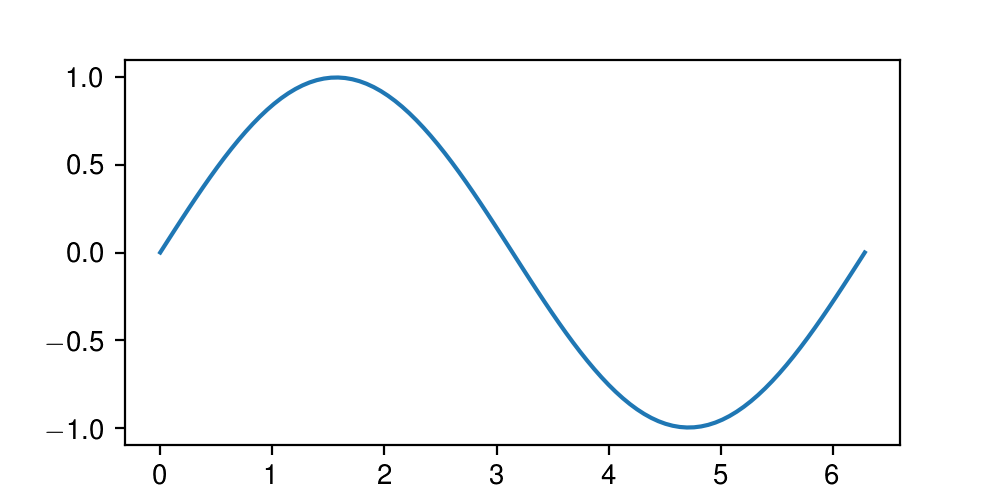

In [11]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)
plt.figure(figsize=(5,2.5))
plt.plot(x,y)

## Units, uncertainties and measurements

The objets **ur**, **Quantity** and **Measurement**, based on the **`pint`** and **`uncertainties`** librairies allows the manipulation of data with units and uncertainties. (see tutorial-1-units-uncertainties)

In [12]:
19.4 * ur.cm / (10 * ur.s)

<Quantity(1.94, 'centimeter / second')>

In [13]:
x= Quantity(10., 'km')
x

<Quantity(10.0, 'kilometer')>

In [14]:
y = Measurement(10, .01, 'km')
print(y)  #TODO: _repr_html not working

(10.000 +/- 0.010) kilometer


## Using the API: a first example with the Isotope database

If you are interested by **NMR**, it might be useful to have information about NMR isotopes, *e.g.*, to include this in some further calculations.

Let's get information about the $^{27}$Al nucleus. 

We use the **Isotopes** class:

In [15]:
al = Isotopes('27Al')
al

Isotopes < 27Al >

In [16]:
print(al.symbol, al.spin)

Al 5/2


In [17]:
quadrupolar_moment = al.Q.to('m^2') 
quadrupolar_moment

<Quantity(1.466e-29, 'meter ** 2')>

In [18]:
gyromagnetic_ratio = al.gamma
gyromagnetic_ratio

<Quantity(11.103076875144868, 'megahertz / tesla')>

It is then obvious how to get the Larmor frequency of aluminium:

In [19]:
B0 = Quantity('9.4 tesla')
print("{freq:~.2f} at {B0:~.2f}".format(freq=al.gamma * B0, B0=B0))

104.37 MHz at 9.40 T
